In [1]:
library("ggplot2")
library("methods")
library("airway")
library("DESeq2")
data("airway")
dds <- DESeqDataSet(se = airway, design = ~ cell + dex)
dds <- DESeq(dds)
de_res <- as.data.frame(results(dds))

Loading required package: SummarizedExperiment
Loading required package: GenomicRanges
Loading required package: stats4
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:stats’:

    IQR, mad, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, cbind, colnames, do.call,
    duplicated, eval, evalq, Filter, Find, get, grep, grepl, intersect,
    is.unsorted, lapply, lengths, Map, mapply, match, mget, order,
    paste, pmax, pmax.int, pmin, pmin.int, Position, rank, rbind,
    Reduce, rownames, sapply, setdiff, sort, table, tapply, union,
    unique, unsplit, which, which.max, which.min

Loading requi

In [2]:
de_res = de_res[!is.na(de_res$pvalue), ]
dim(de_res)

[1] 33469     6

In [3]:
library("IHW")
ihw_res <- ihw(pvalue ~ baseMean,  data = de_res, alpha = 0.05)


Attaching package: ‘IHW’

The following object is masked from ‘package:ggplot2’:

    alpha



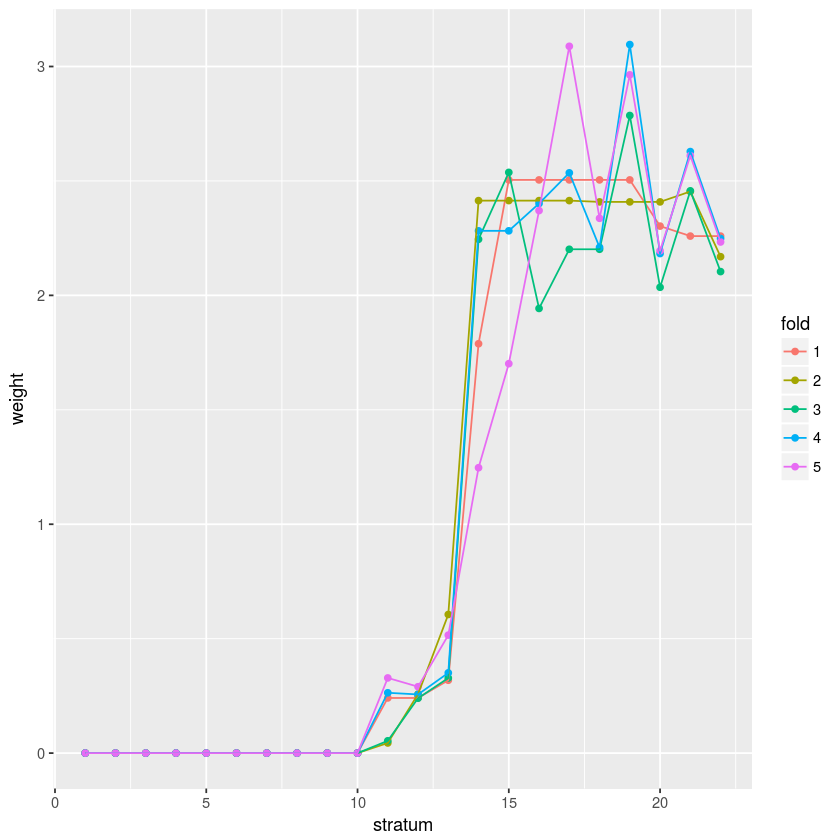

In [4]:
plot(ihw_res)

In [5]:
rejections(ihw_res)

[1] 4078

In [178]:
padj_bh <- p.adjust(de_res$pvalue, method = "BH")
sum(padj_bh <= 0.1, na.rm = TRUE)

[1] 4081

In [195]:
mean(de_res$baseMean)
de_res$high_count = de_res$baseMean > mean(de_res$baseMean)

[1] 639.5422

In [196]:
de_res$high_count2 = ifelse(de_res$high_count,1.0,0.0)
de_res$groupidx = ifelse(de_res$high_count,'H','L')

In [197]:
colnames(de_res)

[1] "baseMean"       "log2FoldChange" "lfcSE"          "stat"          
[5] "pvalue"         "padj"           "high_count"     "high_count2"   
[9] "groupidx"

In [198]:
library("IHW")
ihw_res <- ihw(pvalue ~ high_count2,  data = de_res, alpha = 0.1)
rejections(ihw_res)

[1] 4266

In [199]:
write.csv(de_res, file = "airway.csv")

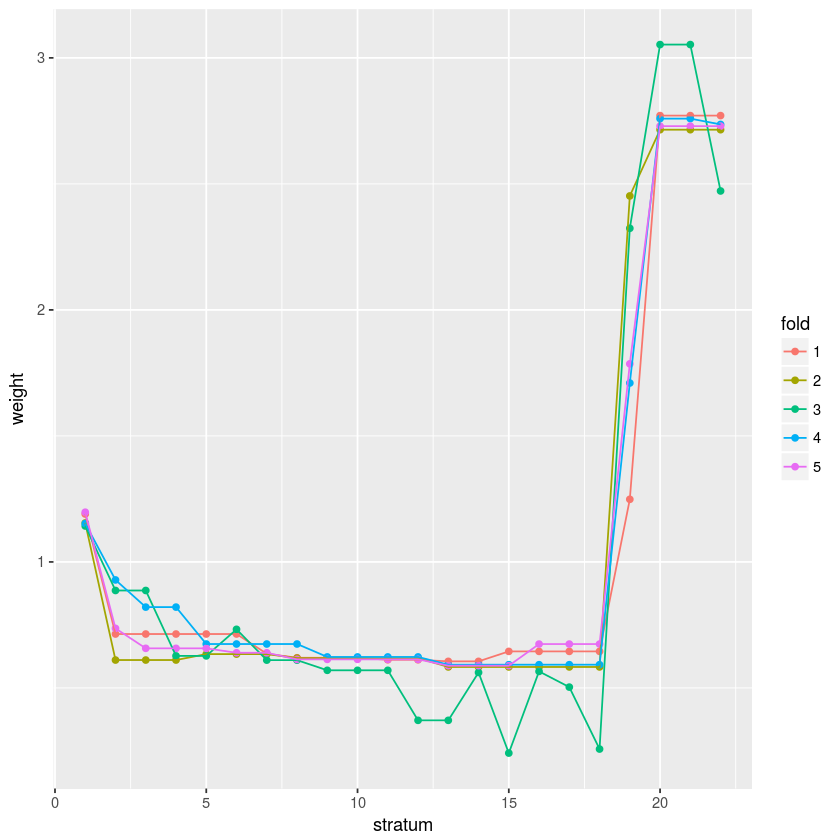

In [200]:
plot(ihw_res)

In [201]:
library('structSSI')
de_res$pvalue[is.na(de_res$pvalue)] = 1

In [202]:
result <- Adaptive.GBH(de_res$pvalue, de_res$high_count2, 0.1, method = 'storey', lambda = 0.5)

In [203]:
summary(result)

GBH adjusted p values: 
          unadjp          adjp group adj.significance
1  1.319237e-138 3.105484e-135     1              ***
2  2.158637e-130 2.304760e-127     1              ***
3  2.937247e-130 2.304760e-127     1              ***
4  1.656535e-123 9.748709e-121     1              ***
5  4.952260e-112 2.331524e-109     1              ***
6  4.867316e-107 1.909610e-104     1              ***
7  1.342345e-103 4.514115e-101     1              ***
8   2.926277e-97  8.610570e-95     1              ***
9   6.278709e-91  1.642231e-88     1              ***
10  4.785944e-87  1.126611e-84     1              ***
[only 10 most significant hypotheses shown] 
--- 
Signif. codes:  0 '***' 0.002 '**' 0.02 '*' 0.1 '.' 0.2 '-' 1 

 Estimated proportion of hypotheses that are null, within each group: 
        1         0 
0.4334377 1.0000000 

 Significance across groups: 
     adj.significance
group     -     .     *    **   ***
    0 28038     0     0     0     0
    1  1690   755   920   621 

In [205]:
920 + 621 + 1445

[1] 2986